In [90]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [91]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [92]:
data.index = pd.to_datetime(data.index)

In [93]:
data.dropna(inplace =True)

In [94]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [47]:
split_1 = int (len(data) * 0.6)
split_2 = int (len(data) * 0.9)
data_in = data[: split_1]
data_out = data[split_1: split_2]
data_hold = data[split_2:]

In [48]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [49]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [51]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [53]:
import matplotlib.pyplot as plt

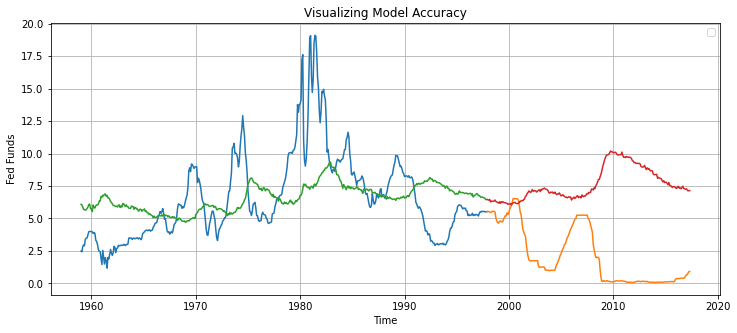

In [56]:
plt.figure(figsize = (12,5))

plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [95]:
from sklearn.metrics import mean_squared_error

In [97]:
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out))

In [98]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566852


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
max_degrees = 3

degrees:  1


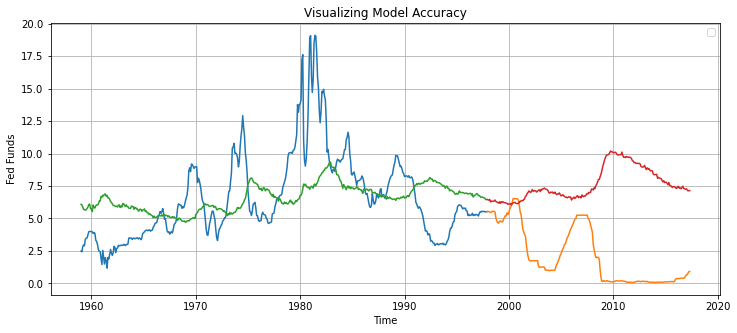

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566712
degrees:  2


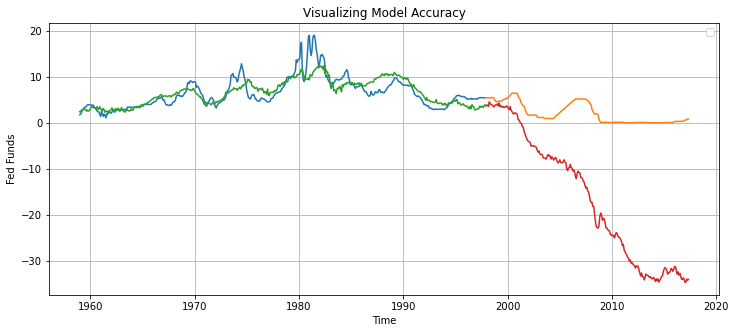

Insample MSE :  3.863477139276068
Outsample MSE :  481.44650991740434
degrees:  3


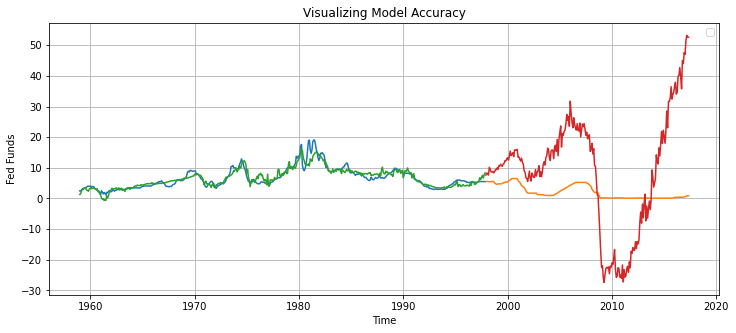

Insample MSE :  1.872363627194613
Outsample MSE :  371.7661890061883


In [102]:
for degrees in range(1, max_degrees+1):
    print('degrees: ', degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    #Q3
    model1 = sm.OLS(y_in, X_in_poly).fit()
    #Q4
    plt.figure(figsize = (12,5))
    
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)
    
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(y_in, in_preds)
    out_mse_1 = mean_squared_error(y_out, out_preds)
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

The observation from the code and its outputs indicates that increasing the degree of polynomial features in a model leads to better fitting on training data (lower in-sample MSE) but worse performance on new, unseen data (higher out-sample MSE). This trend suggests overfitting: as the model complexity increases (with higher polynomial degrees), it becomes more tailored to the training data and less capable of generalizing to new data.